# Agregacija združevanje in tranformacija podatkov

## Data Aggregation

### Introduction to the Data

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [8]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Aggregate Data with Loops

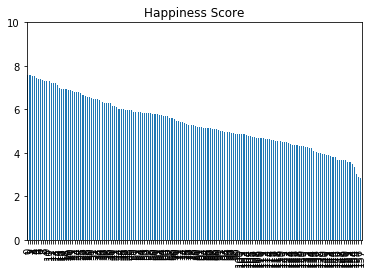

In [11]:
happiness2015['Happiness Score'].plot(kind='bar',
                                     title = 'Happiness Score',
                                     ylim=(0,10))
plt.show()

In [12]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [14]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
120,Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


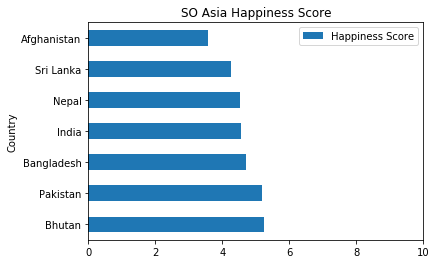

In [16]:
so_asia.plot(x = 'Country',
            y = 'Happiness Score',
            kind = 'barh',
            title = 'SO Asia Happiness Score',
            xlim= (0, 10))

In [17]:
mean_happiness = {}

for region in happiness2015['Region'].unique(): #razdelimo dataset na grupe
    region_group = happiness2015[happiness2015['Region'] == region]
    region_mean = region_group['Happiness Score'].mean() #nad vsako grupo naredimo mean
    mean_happiness[region] = region_mean #rezultate združimo 

### GroupBy Operation

<img src="./images/split_apply_combine.svg">

#### Creating GroupBy Objects

<img src="./images/Groups.svg">

In [18]:
happiness2015['Region'].value_counts() #koliko držav je v kateri regiji.

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [19]:
happiness2015.groupby('Region')

In [21]:
gruped = happiness2015.groupby('Region')
gruped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


#### Exploring GroupBy Objects

In [22]:
gruped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [23]:
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


#### Common Aggregation Methods

In [25]:
gruped = happiness2015.groupby('Region')
print(grouped.size())

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64


In [26]:
means = grouped.mean()
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


#### Aggregating Specific Columns

In [27]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [30]:
happiness2015.groupby('Region')['Happiness Score'].mean() #pravi način

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

#### Agg() Method

In [ ]:
#groupby.agg(fun1, fun2...)

In [32]:
import numpy as np

def dif(group):
    return (group.max()-group.min()) #lahko uporabimo tudi svojo funkcijo

happiness2015.groupby('Region')['Happiness Score'].agg([np.mean, np.max, dif])

,mean,amax,dif
Region,,,
Australia and New Zealand,7.285000,7.286,0.002
Central and Eastern Europe,5.332931,6.505,2.287
Eastern Asia,5.626167,6.298,1.424
Latin America and Caribbean,6.144682,7.226,2.708
Middle East and Northern Africa,5.406900,7.278,4.272
North America,7.273000,7.427,0.308
Southeastern Asia,5.317444,6.798,2.979
Southern Asia,4.580857,5.253,1.678
Sub-Saharan Africa,4.202800,5.477,2.638


In [34]:
happiness2015.groupby('Region')['Happiness Score'].agg([np.mean, np.max, dif]).sort_values(by='mean', ascending = False)

,mean,amax,dif
Region,,,
Australia and New Zealand,7.285000,7.286,0.002
North America,7.273000,7.427,0.308
Western Europe,6.689619,7.587,2.730
Latin America and Caribbean,6.144682,7.226,2.708
Eastern Asia,5.626167,6.298,1.424
Middle East and Northern Africa,5.406900,7.278,4.272
Central and Eastern Europe,5.332931,6.505,2.287
Southeastern Asia,5.317444,6.798,2.979
Southern Asia,4.580857,5.253,1.678


In [40]:
happiness2015.groupby('Region')['Family'].max()

Region
Australia and New Zealand          1.31967
Central and Eastern Europe         1.34043
Eastern Asia                       1.30060
Latin America and Caribbean        1.30477
Middle East and Northern Africa    1.22393
North America                      1.32261
Southeastern Asia                  1.26504
Southern Asia                      1.10395
Sub-Saharan Africa                 1.18468
Western Europe                     1.40223
Name: Family, dtype: float64

#### Computing Multiple and Custom Aggregations

### Pivot Tables

<img src="./images/PV_Syntax.svg">

In [ ]:
#happiness2015.groupby('Region')['Happiness Score'].mean()

In [41]:
happiness2015.pivot_table(values='Happiness Score', index = 'Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [47]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index = 'Region').sort_values(by = 'Region', ascending = 'False') #default aggregation function je mean

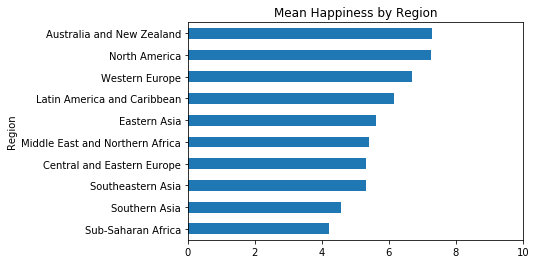

In [46]:
pv_happiness.plot(kind = 'barh',
                 title = 'Mean Happiness by Region',
                 xlim = (0,10),
                 legend = False)

In [48]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index = 'Region', aggfunc=np.mean, margins = True)
pv_happiness #margins parameter doda povprečje vseh vrednosti

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


## Combining Data

In [49]:
import pandas as pd

happiness2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("data/World_Happiness_2017.csv")

In [50]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [51]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


### Combining Dataframes with the Concat Function

<img src="./images/Concat_Updated.svg">

<img src="./images/Concat_Axis1.svg">

<img src="./images/Concat_syntax.svg">

In [ ]:
#concat samo dodaja nove vrstice oz. stolpce

In [52]:
head_2015 = happiness2015[['Country', 'Happiness Score']].head()
head_2016 = happiness2016[['Country', 'Happiness Score']].head()

In [53]:
head_2015

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427


In [54]:
head_2016

,Country,Happiness Score
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [57]:
pd.concat([head_2015, head_2016], axis = 0)

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [58]:
pd.concat([head_2015, head_2016], axis = 1)

,Country,Happiness Score,Country,Happiness Score
0,Switzerland,7.587,Denmark,7.526
1,Iceland,7.561,Switzerland,7.509
2,Denmark,7.527,Iceland,7.501
3,Norway,7.522,Norway,7.498
4,Canada,7.427,Finland,7.413


In [59]:
pd.concat([head_2015, head_2016], axis = 0, sort = False)

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [60]:
pd.concat([head_2015, head_2016], axis = 0, sort = False, ignore_index = True)

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
5,Denmark,7.526
6,Switzerland,7.509
7,Iceland,7.501
8,Norway,7.498
9,Finland,7.413


In [ ]:
subjects = ['Year','Country','Happiness Score', 'Standard Error']

<img src="./images/Concat_DifShapes.svg">

### Joining Dataframes with the Merge Function

<img src="./images/Merge_link.svg">

<img src="./images/Merge.svg">

<img src="./images/Merge_syntax.svg">

In [ ]:
#merge zlaga skupaj po indexih, povemo katera tabela je na levi, katera na desni in po katerem stolpcub

In [61]:
three_2015 = happiness2015[['Year', 'Country', 'Happiness Score']].iloc[2:5]
three_2016 = happiness2016[['Year', 'Country', 'Happiness Score']].iloc[2:5]

In [62]:
three_2015

,Year,Country,Happiness Score
2,2015,Denmark,7.527
3,2015,Norway,7.522
4,2015,Canada,7.427


In [63]:
three_2016

,Year,Country,Happiness Score
2,2016,Iceland,7.501
3,2016,Norway,7.498
4,2016,Finland,7.413


In [64]:
merged = pd.merge(left = three_2015, right = three_2016, on = 'Country')
merged

,Year_x,Country,Happiness Score_x,Year_y,Happiness Score_y
0,2015,Norway,7.522,2016,7.498


#### Joining on Columns

In [ ]:
#inner samo elemente, ki so v obeh tabelah
#outer vse elemente
#left vzame vse v leve in iz desnih doda kar je
#right vzame vse desne in doda samo tiste iz levih, ki so

In [65]:
merged_left = pd.merge(left = three_2015,
                      right = three_2016,
                      on = 'Country',
                      how = 'left')

In [66]:
merged_left

,Year_x,Country,Happiness Score_x,Year_y,Happiness Score_y
0,2015,Denmark,7.527,NaN,NaN
1,2015,Norway,7.522,2016.0,7.498
2,2015,Canada,7.427,NaN,NaN


In [67]:
merged_left = pd.merge(left = three_2016,
                      right = three_2015,
                      on = 'Country',
                      how = 'left')

In [68]:
merged_left

,Year_x,Country,Happiness Score_x,Year_y,Happiness Score_y
0,2016,Iceland,7.501,NaN,NaN
1,2016,Norway,7.498,2015.0,7.522
2,2016,Finland,7.413,NaN,NaN


#### Left Joins

In [71]:
merged_left = pd.merge(left = three_2016,
                      right = three_2015,
                      on = 'Country',
                      how = 'left',
                      suffixes = ('_2016', '_2015')) #dodamo pripone

In [72]:
merged_left

,Year_2016,Country,Happiness Score_2016,Year_2015,Happiness Score_2015
0,2016,Iceland,7.501,NaN,NaN
1,2016,Norway,7.498,2015.0,7.522
2,2016,Finland,7.413,NaN,NaN


#### Join on Index

<img src="./images/Index.svg">

In [73]:
four_2015 = happiness2015[['Country','Year', 'Happiness Score']].iloc[2:6]
three_2016 = happiness2016[['Country','Year', 'Happiness Score']].iloc[2:5]

In [74]:
four_2015

,Country,Year,Happiness Score
2,Denmark,2015,7.527
3,Norway,2015,7.522
4,Canada,2015,7.427
5,Finland,2015,7.406


In [75]:
three_2016

,Country,Year,Happiness Score
2,Iceland,2016,7.501
3,Norway,2016,7.498
4,Finland,2016,7.413


In [77]:
pd.merge(left = four_2015,
         right = three_2016,
         left_index = True,
         right_index = True,
         how = 'inner',
         suffixes = ('_2015', '_2015'))
         

,Country_2015,Year_2015,Happiness Score_2015,Country_2015,Year_2015,Happiness Score_2015
2,Denmark,2015,7.527,Iceland,2016,7.501
3,Norway,2015,7.522,Norway,2016,7.498
4,Canada,2015,7.427,Finland,2016,7.413


In [78]:
pd.merge(left = four_2015,
         right = three_2016,
         left_index = True,
         right_index = True,
         how = 'left',
         suffixes = ('_2015', '_2015'))

,Country_2015,Year_2015,Happiness Score_2015,Country_2015,Year_2015,Happiness Score_2015
2,Denmark,2015,7.527,Iceland,2016.0,7.501
3,Norway,2015,7.522,Norway,2016.0,7.498
4,Canada,2015,7.427,Finland,2016.0,7.413
5,Finland,2015,7.406,NaN,NaN,NaN


### Primer: Combine Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th></th>
<th><span style="font-weight:bold">pd.concat()</span></th>
<th><span style="font-weight:bold">pd.merge()</span></th>
</tr>
<tr>
<td><span style="font-style:normal">Default Join Type</span></td>
<td><span style="font-weight:300;font-style:normal">Outer</span></td>
<td><span style="font-weight:300;font-style:normal">Inner</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine More Than Two Dataframes at a Time?</span></td>
<td><span style="font-weight:300;font-style:normal">Yes</span></td>
<td><span style="font-weight:300;font-style:normal">No</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine Dataframes Vertically</span><br><span style="font-style:normal">(axis=0) or Horizontally (axis=1)?</span><br></td>
<td><span style="font-weight:300;font-style:normal">Both</span></td>
<td><span style="font-weight:300;font-style:normal">Horizontally</span></td>
</tr>
<tr>
<td>Syntax</td>
<td><span style="font-weight:bold">Concat (Vertically)</span><br>concat([df1,df2,df3])<br><br><span style="font-weight:bold">Concat (Horizontally)</span><br>concat([df1,df2,df3], axis = 1)<br><br><br><br></td>
<td><span style="font-weight:bold">Merge (Join on Columns)</span><br>merge(left = df1, right = df2, how = 'join_type', on = 'Col')<br><br><span style="font-weight:bold">Merge (Join on Index)</span><br>merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)<br><br><br><br></td>
</tr>
</tbody></table>


In [79]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [80]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [81]:
happiness2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [82]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [83]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace = True)

In [84]:
happiness = pd.concat([happiness2015, happiness2016, happiness2017], sort = True)

In [86]:
happiness.head()

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.34951,0.66557,0.29678,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.40223,0.62877,0.43630,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,NaN,1.36058,0.64938,0.34139,3.0,7.527,...,NaN,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,NaN,2015
3,Norway,2.46531,NaN,1.45900,NaN,1.33095,0.66973,0.34699,4.0,7.522,...,NaN,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,NaN,2015
4,Canada,2.45176,NaN,1.32629,NaN,1.32261,0.63297,0.45811,5.0,7.427,...,NaN,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,NaN,2015


In [87]:
happiness.tail()

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
150,Rwanda,NaN,0.540061,NaN,0.368746,0.945707,0.581844,0.252756,NaN,3.471,...,0.326425,NaN,NaN,NaN,NaN,0.455220,NaN,3.543030,3.398970,2017
151,Syria,NaN,1.061574,NaN,0.777153,0.396103,0.081539,0.493664,NaN,3.462,...,0.500533,NaN,NaN,NaN,NaN,0.151347,NaN,3.663669,3.260331,2017
152,Tanzania,NaN,0.621130,NaN,0.511136,1.041990,0.390018,0.354256,NaN,3.349,...,0.364509,NaN,NaN,NaN,NaN,0.066035,NaN,3.461430,3.236570,2017
153,Burundi,NaN,1.683024,NaN,0.091623,0.629794,0.059901,0.204435,NaN,2.905,...,0.151611,NaN,NaN,NaN,NaN,0.084148,NaN,3.074690,2.735310,2017
154,Central African Republic,NaN,2.066005,NaN,0.000000,0.000000,0.270842,0.280876,NaN,2.693,...,0.018773,NaN,NaN,NaN,NaN,0.056565,NaN,2.864884,2.521116,2017


In [89]:
pivot_happiness = happiness.pivot_table(values = 'Happiness Score', index = 'Year', aggfunc = np.mean)
pivot_happiness

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


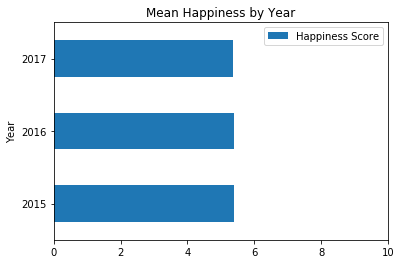

In [90]:
pivot_happiness.plot(kind='barh', title = 'Mean Happiness by Year', xlim = (0,10))
plt.show()

## Transforming Data

In [91]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [92]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [93]:
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

In [94]:
happiness2015 = happiness2015.rename(mapping, axis = 1)

In [95]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


### Map and Apply Methods (Element-wise)

In [96]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

<img src="./images/Map_generic.svg">

In [97]:
economy_impact_map = happiness2015['Economy'].map(label)

In [98]:
economy_impact_map

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [99]:
economy_impact_apply = happiness2015['Economy'].apply(label)

In [100]:
economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [101]:
economy_impact_map.equals(economy_impact_map)

True

<img src="./images/Map.svg">

In [102]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

In [103]:
happiness2015['Economy'].map(label, x = 0.8) #ta ne dela s funkcijami s parametri

TypeError: map() got an unexpected keyword argument 'x'

In [104]:
happiness2015['Economy'].apply(label, x = 0.8) #dela s funkcijami s parametri

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [106]:
happiness2015['Economy_Impact'] = happiness2015['Economy'].apply(label, x = 1)
happiness2015['Family_Impact'] = happiness2015['Family'].apply(label, x = 1)

### Applymap Method (Element-wise to Multiple Columns)

### Apply Method (along an Axis)

<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
</tbody></table>

<img src="./images/Apply_counts.svg">

In [98]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']




In [101]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

### Melt Function

<img src="./images/Melt_Syntax.svg">

In [107]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

### Primer: Aggregate the Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Dataframe</td>
<td>No, applies functions along an axis</td>
</tr>
</tbody></table>